In [1]:
import cv2
import numpy as np
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import torch

import sys; sys.path.append('..')
from continuous_landmarks.dataset.transforms import (
    Compose, Align, RandomResizedCrop,
)

from draw_points import draw_points

In [2]:
canon_shape = torch.load('../continuous_landmarks/dataset/facescape_mouth_stretch.pth')

# 300-W dataset

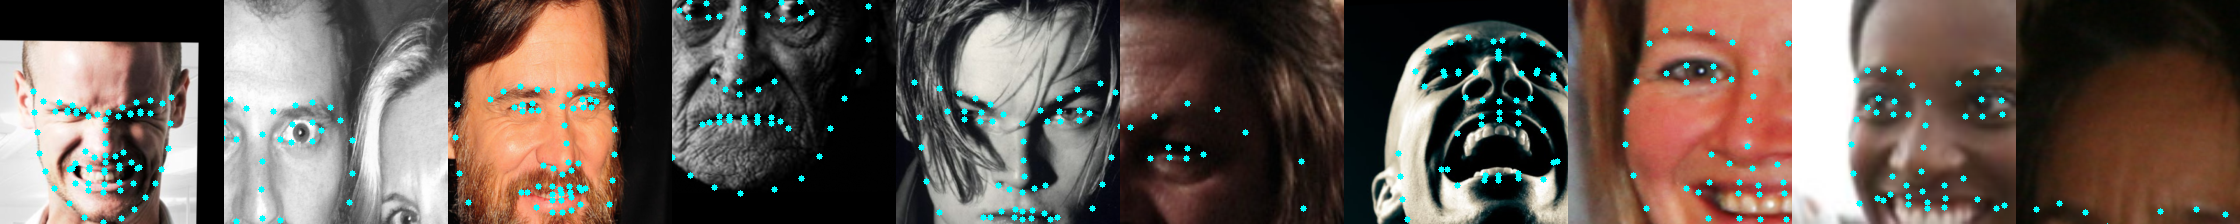

In [3]:
from continuous_landmarks.dataset import face300w

ds300w = face300w.Face300WDataset(
    Path('../data/300W/'),
    Compose([
        Align(face300w.get_eyes_mouth),
        RandomResizedCrop(224),
    ])
)

Image.fromarray(np.hstack([draw_points(*ds300w[i]) for i in range(10)]))

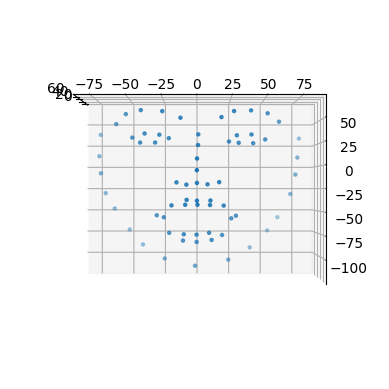

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(azim=0, elev=0, vertical_axis='y')
ax.scatter(*ds300w.canonical.T, s=5)

# Fake It Till You Make It dataset

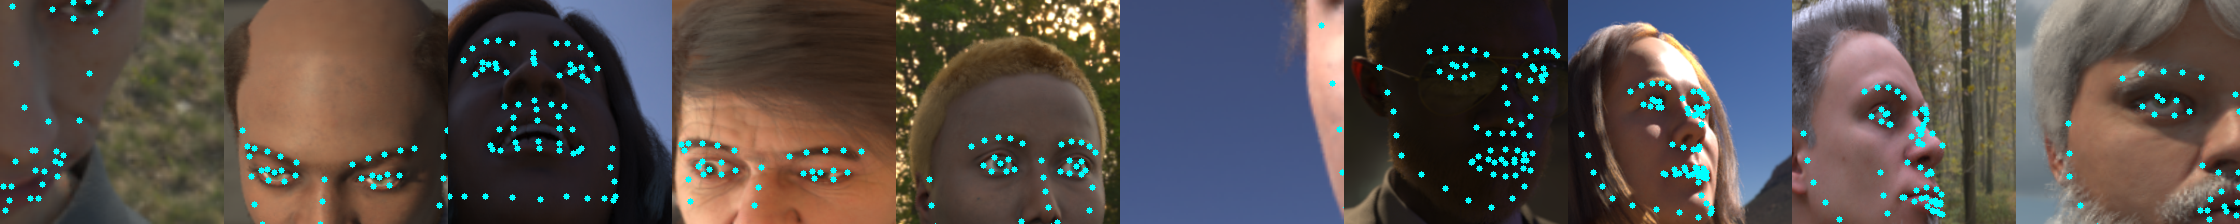

In [5]:
from continuous_landmarks.dataset import fitymi

ds_fitymi = fitymi.FITYMIDataset(
    Path('../data/FITYMI/'),
    Compose([
        Align(fitymi.get_eyes_mouth),
        RandomResizedCrop(224),
    ])
)

Image.fromarray(np.hstack([draw_points(*ds_fitymi[i]) for i in range(10)]))

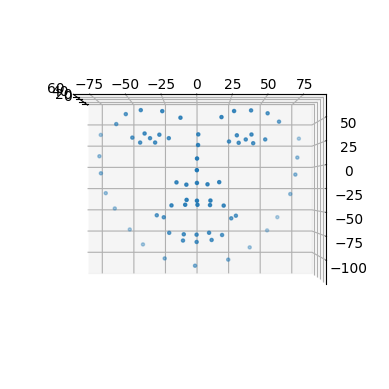

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(azim=0, elev=0, vertical_axis='y')
ax.scatter(*ds_fitymi.canonical.T, s=5)

# FaceScape

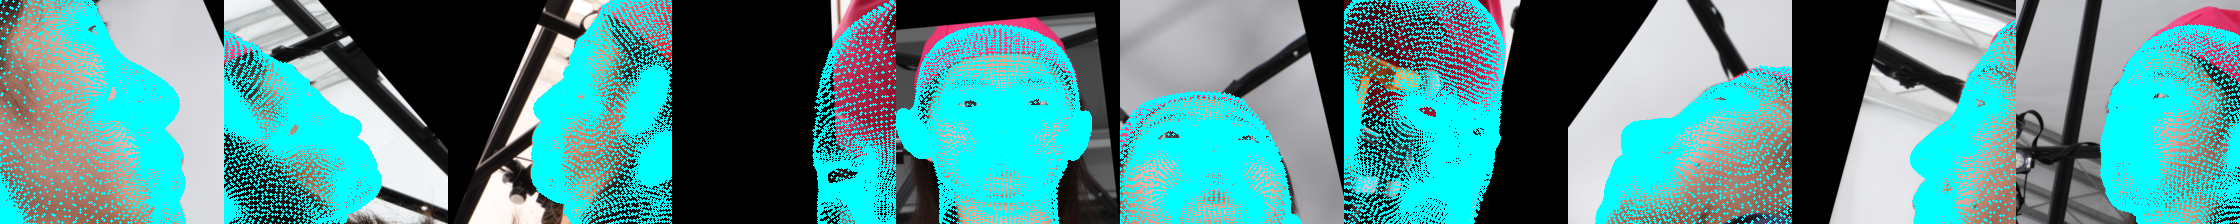

In [7]:
from continuous_landmarks.dataset import facescape

ds_facescape = facescape.FaceScapeLandmarkDataset(
    '/apollo/datasets/FaceScape',
    Compose([
        Align(facescape.get_eyes_mouth),
        RandomResizedCrop(224),
    ]),
    filter_public=True
)

Image.fromarray(np.hstack([draw_points(*ds_facescape[i], size=1) for i in range(10)]))

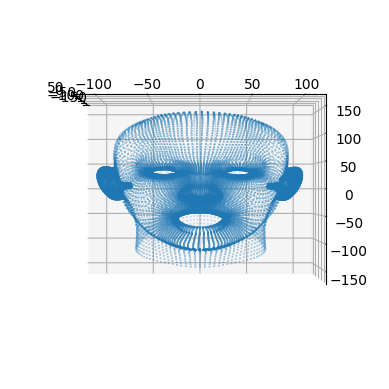

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(azim=0, elev=0, vertical_axis='y')
ax.scatter(*ds_facescape.canonical.T, s=.1)